# Spatial Relationships

##  Shapely geometries and spatial relationships

## Scalar Geometry Values

Nilai skalar geometri adalah besaran fisik yang hanya memiliki magnitude atau nilai numerik, tanpa memperhatikan arah. Ini berarti bahwa nilai skalar hanya mengukur seberapa besar atau kecil besaran fisik tersebut, tanpa memperhatikan orientasi atau arahnya

In [62]:
import geopandas

In [63]:
cities = geopandas.read_file('dataset/ne_110m_populated_places.shp')
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


Pada kolom geometry diatas, terdapat feature vektor yang terdiri dari geometry berjenis titik dan memiliki nilai koordinat.

In [64]:
brussels = cities.loc[170,'geometry']
print(brussels)

POINT (4.33137074969045 50.83526293533032)


In [65]:
type(brussels)

shapely.geometry.point.Point

Pada object brussels diketahui bahwa geometri berjenis point. Shapely ?

### The Shapely Python Pakages

Shapely adalah sebuah pustaka (library) Python yang digunakan untuk melakukan analisis geometri dan operasi geometri pada objek geometri. Shapely adalah salah satu pustaka yang populer dalam pemrograman geospasial dan digunakan untuk memanipulasi dan menganalisis objek geometri seperti titik, garis, poligon, dan berbagai bentuk geometri lainnya. Berikut beberapa poin utama tentang Shapely:

- **Objek Geometri**: Shapely memungkinkan Anda untuk membuat, merepresentasikan, dan memanipulasi berbagai jenis objek geometri, termasuk:
    - Titik (Point): Merepresentasikan lokasi dalam ruang dua dimensi atau tiga dimensi.
    - Garis (LineString): Merepresentasikan rangkaian titik yang membentuk garis atau kurva.
    - Poligon (Polygon): Merepresentasikan daerah tertutup dengan batas yang terdiri dari garis dan meliputi area tertentu.
- **Operasi Geometri**: Shapely menyediakan berbagai operasi geometri yang memungkinkan Anda untuk melakukan manipulasi dan analisis objek geometri. Ini termasuk operasi seperti:
    - Union: Menggabungkan dua objek geometri.
    - Intersection: Menemukan area yang bersamaan antara dua objek geometri.
    - Difference: Menghilangkan area yang bersamaan dari satu objek terhadap objek lainnya.
    - Buffer: Membuat zona buffer (lingkaran atau area) di sekitar objek geometri.
    - Convex Hull: Mencari poligon terkecil yang mencakup semua titik dalam objek geometri.

- **Predikat Geometri**: Shapely juga menyediakan predikat geometri yang memungkinkan Anda untuk menguji hubungan antara objek geometri, seperti:
    - Intersect: Apakah dua objek geometri bersentuhan?
    - Contains: Apakah satu objek geometri berada sepenuhnya di dalam objek lain?
    - Within: Apakah satu objek geometri berada di dalam objek lain?
    - Touches: Apakah dua objek geometri saling bersentuhan di titik-titik mereka?

- **Representasi Data**: Shapely mendukung representasi data geometri dalam format yang umum digunakan, seperti Well-Known Text (WKT) dan GeoJSON. Ini memudahkan impor dan ekspor data geometri dalam berbagai format.

- **Interoperabilitas**: Shapely bekerja dengan baik bersama dengan perpustakaan lain dalam ekosistem pemrograman geospasial Python, seperti GeoPandas, Matplotlib, dan perangkat lunak GIS (Sistem Informasi Geografis) lainnya.

- **Penggunaan Umum**: Shapely digunakan dalam berbagai aplikasi, termasuk pemetaan, analisis lingkungan, perencanaan kota, ilmu bumi, perencanaan transportasi, permodelan geologi, dan banyak lagi.

Shapely adalah alat yang berguna dalam analisis geospasial, pemodelan, dan pemrosesan data geometri. Biasanya, Shapely digunakan bersamaan dengan perpustakaan lain seperti GeoPandas atau perangkat lunak GIS (Sistem Informasi Geografis) untuk menyelesaikan tugas analisis geospasial yang lebih kompleks dan spesifik.

> - Shapely adalah library python untuk manipulasi dan analisis object geometry
> - terdapat berbagai object geometry dan digunakan bersama dengan Geopandas saat pengoperasiannya
> - Geoseries (kolom geometry pada Geodataframe) tersusun dari objects shapely 

### Geometry Objects

In [66]:
countries = geopandas.read_file('dataset/countries_all.geojson')
countries.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [67]:
# akses object geometry dari GeoDataFrame
brussels = cities.loc[170,'geometry'] # point object
paris = cities.loc[235,'geometry'] # point object
belgium = countries.loc[countries['ADMIN'] == 'Belgium', 'geometry'].squeeze() # polygon object
france = countries.loc[countries['ADMIN'] == 'France', 'geometry'].squeeze() # polygon object
uk = countries.loc[countries['ADMIN'] == 'United Kingdom', 'geometry'].squeeze() # polygon object

In [68]:
# membuat object geometry secara manual
from shapely.geometry import Point
p = Point(1,2)
print(p)

POINT (1 2)


### Spatial Methods

object geometry yang baik akan memungkinkan penggunaan method python dalam spasial

In [69]:
# menghitung area secara otomatis
belgium.area

3.8973508416743203

Pada code diatas, belgium merupakan variable object yang memiliki geometry object polygon. Dalam geometry tersebut memiliki atribut area sehingga memungkinkan untuk perhitungan area secara otomatis hanya dengan melalui pemangilaan method `.area`.

Selain kemudahan dalam perhitungan area, perhitungan jarak antara dua titik dapat dilakukan secara langsung melalui method `.distance()`.

In [70]:
brussels.distance(paris) 

2.8049127723186214

Pada code diatas perhitungan jarak yang digunakan dalam garis lurus. `

Selain method `.area` dan `.distance()` masih terdapat beberapa method lagi dalam pengolahan data spasial

## Spatial Relationship

Hubungan spasial (spatial relationship) merujuk pada cara objek atau entitas berinteraksi atau berhubungan satu sama lain dalam ruang geografis atau geometri. Ini adalah konsep penting dalam ilmu geografi, pemodelan geospasial, pemrograman geospasial, dan ilmu yang berkaitan dengan pemahaman tentang bagaimana objek atau area berinteraksi dan saling memengaruhi. Berikut beberapa aspek penting dari hubungan spasial:

- **Posisi Relatif**: Hubungan spasial menggambarkan posisi relatif antara objek atau area dalam ruang geografis atau geometri. Ini dapat mencakup hubungan seperti "di atas," "di bawah," "di sebelah," "berdampingan," "di dalam," "di luar," dan banyak lagi. Misalnya, Anda dapat menggambarkan hubungan spasial antara dua gedung, seperti "Gedung A terletak di sebelah Gedung B."

- **Interaksi**: Hubungan spasial mencakup interaksi antara objek atau area. Ini bisa berarti bagaimana dua objek berinteraksi satu sama lain, seperti dalam analisis jalan dan transportasi, atau bagaimana objek mempengaruhi lingkungannya, seperti dalam analisis dampak lingkungan.

- **Analisis Geospasial**: Dalam ilmu geografi dan pemodelan geospasial, hubungan spasial sering digunakan untuk menganalisis pola dan tren geografis. Ini dapat melibatkan analisis jarak antara objek, distribusi spasial, korelasi antara variabel geografis, dan lainnya.

- **Perencanaan Kota dan Tata Ruang**: Dalam perencanaan kota dan tata ruang, hubungan spasial digunakan untuk merencanakan penggunaan lahan, transportasi, zonasi, dan infrastruktur. Ini membantu dalam pengambilan keputusan perencanaan kota yang berkelanjutan.

- **Pemrograman Geospasial**: Dalam pemrograman geospasial, pemahaman hubungan spasial menjadi kunci dalam pengembangan aplikasi dan layanan geospasial. Ini melibatkan perhitungan jarak, overlay geometri, dan analisis geospasial lainnya.

- **Ilmu Bumi dan Geologi**: Dalam ilmu bumi dan geologi, hubungan spasial digunakan untuk memahami gejala alam seperti gempa bumi, letusan gunung berapi, dan pergerakan lempeng tektonik.

Hubungan spasial penting dalam pemahaman dan analisis berbagai aspek dalam dunia fisik dan geografis. Ini membantu kita menggambarkan, menganalisis, dan merencanakan bagaimana objek dan entitas berinteraksi dalam konteks geografis dan geometri.

> selain memungkinkan pengunaaan method spasial yang untuk object geometry, shapely memungkinkan untuk menghubungkan geometry yang berbeda secara spasial karena shapely tidak memiliki method untuk visualisasi beragam geometry, maka memungkinkan untuk menyimpan dalam GeoSeries dan plot

In [71]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

<Axes: >

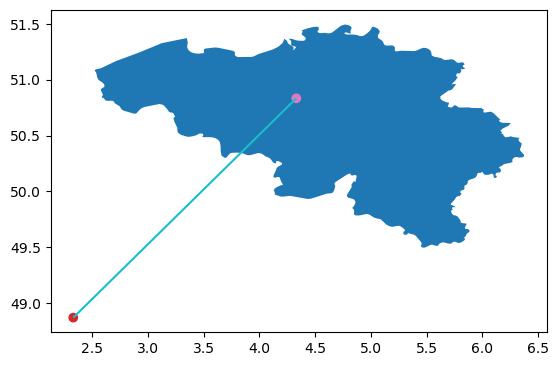

In [72]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

pada gambar diatas, Ilustrasi hubungan spatial antar objek titik mewakili kota Brussel dan kota Paris serta terdapat garis yang menghubungkannya. Titik kota brussel terdapat didalam polygon Belgium

In [73]:
# cek apakah dalam polygon belgium terdapat titik brussels
belgium.contains(brussels)

True

In [74]:
france.contains(brussels)

False

### Exercise 

**Creating a Point geometry**

The Eiffel Tower is an iron lattice tower built in the 19th century, and is probably the most iconic view of Paris.
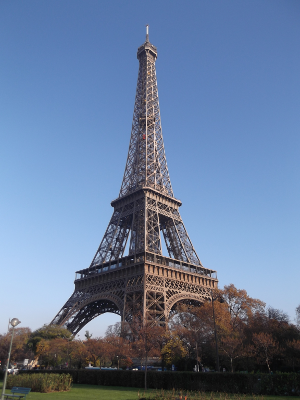
(By couscouschocolat [CC BY 2.0], via Wikimedia Commons)

The location of the Eiffel Tower is: x of 648237.3, and y of 6862271.9.

In [75]:
# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

# Print the result
print(eiffel_tower)

POINT (648237.3 6862271.9)


> Excellent! That is the correct way to create the geometry object for the point.

**Shapely's spatial methods**

Now we have a shapely Point object for the Eiffel Tower, we can use the different methods available on such a geometry object to perform spatial operations, such as calculating a distance or checking a spatial relationship.

We repeated the construction of eiffel_tower, and also provide the code that extracts one of the neighbourhoods (the Montparnasse district), as well as one of the bike stations located within Paris.


* The `Point` class is available in the `shapely.geometry` submodule
* Creating a point can be done by passing the x and y coordinates to the `Point()` constructor.
* The `within()` method checks if the object is located within the passed geometry (used as `geometry1.within(geometry2)`).
* The `contains()` method checks if the object contains the passed geometry (used as `geometry1.contains(geometry2)`).
* To calculate the distance between two geometries, the `distance()` method of one of the geometries can be used.

In [76]:
districts = geopandas.read_file("dataset/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("dataset/paris_bike_stations.geojson").to_crs(epsg=2154)

In [77]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

False


In [78]:
# Does the Montparnasse district contains the bike station?
print(district_montparnasse.contains(bike_station))

True


In [79]:
# The distance between the Eiffel Tower and the bike station?
print(eiffel_tower.distance(bike_station))

3540.1534488921966


> Nice! Note that the contains() and within() methods are the opposite of each other: if geom1.contains(geom2) is True, then also geom2.within(geom1) will be False.

## Spatial Relationship with Geopandas

Sebelumnya kita telah berhasil mempelajari hubungan spasial antar dua objek geometri pada kota brussel dan paris seperti dibawah ini. memungkinkan kita untuk menjawab apakah kota brussel terletak di Perancis dll.

In [80]:
brussels.within(france)

False

In [81]:
paris.within(france)

True

### Elemet-wise spatial relationship methods

Namun jika hubungan spasial ini dipelajari satu per satu akan memakan waktu dan tidak efisien. Untuk itu terdapat fungsi yang dapat digunakan untuk operasi tiap geometry pada keseluruhan geodataframe.

In [82]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [83]:
cities.within(france)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

In [84]:
cities['geometry'][0].within(france)

False

pada code diatas, melalui penggunaan method `.within()` maka setiap kota dalam geodataframe cities akan dicocokan apakah termasuk dalam negara perancis ? dari hasil penggunaan fungsi tersebut akan menghasilkan output boolean. Selanjutnya filtering data dapat dilakukan untuk mengetahui kota mana saja yang termasuk dalam negara yang sudah ditentukan.

### Filtering by Spatial Relation

In [85]:
cities[cities.within(france)]

,name,geometry
235,Paris,POINT (2.33139 48.86864)


In [86]:
cities['geometry'][235].within(france)

True

Serupa dengan pengunaan filtering di Pandas, hasil output boolean dapat di subset dengan geodataframe yang digunakan dan hanya akan menapilkan apabila hasil output dalam boolean menunjukan hasil TRUE. Apabila FALSE data tidak akan ditampilkan karena tidak berhasil melewati filtering. 

In [87]:
rivers = geopandas.read_file('dataset/ne_50m_rivers_lake_centerlines.shp')
rivers.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,name_en,min_label,geometry
0,6,Lake Centerline,Kama,None,5.0,None,Kama,6.0,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,5.0,None,Kama,6.0,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,Abay,4.0,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,Al Furat,4.0,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,Alabama,6.0,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


pada geodataframe diatas adalah informasi mengenai sungai. JIka ingin mengetahui negara mana saja yang melintasi atau memotong sungai amazon ?

In [88]:
# Filtering data
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

# lakukan operasi intersections
mask = countries.intersects(amazon)

In [89]:
countries[mask]

,ADMIN,ISO_A3,geometry
33,Brazil,BRA,"MULTIPOLYGON (((-48.54259 -27.81666, -48.55187..."
50,Colombia,COL,"MULTIPOLYGON (((-78.20489 2.68734, -78.18768 2..."
177,Peru,PER,"MULTIPOLYGON (((-76.17566 -14.28837, -76.17959..."


### Exercise 

**In which district in the Eiffel Tower located?**

Let's return to the Eiffel Tower example. In previous exercises, we constructed a Point geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it is located.

The districts GeoDataFrame has been loaded, and the Shapely and GeoPandas libraries are imported.

* Create a boolean mask (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result mask.
* Filter the districts dataframe with the boolean mask and print the result.

In [90]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(648237.3, 6862271.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [91]:
# Filter the districts with the boolean mask
print(districts[mask])

    id district_name  population  \
27  28  Gros-Caillou       25156   

                                             geometry  
27  POLYGON ((649336.752 6861767.761, 649110.815 6...  


> Great work! So now we know that the Eiffel Tower is located in the "Gros-Caillou" district (literally translated: "Big Stone").

**How far is the closest bike stations?**

Now, we might be interested in the restaurants nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the restaurants within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the restaurants. Based on this result, we can then create a mask that takes True if the restaurant is within 1km, and False otherwise, and use it to filter the restaurants GeoDataFrame. Finally, we make a visualization of this subset.

The restaurants GeoDataFrame has been loaded, and the eiffel_tower object created. Further, matplotlib, GeoPandas and contextily have been imported.

- Calculate the distance to the Eiffel Tower for each restaurant, and call the result dist_eiffel.
- Print the distance to the closest restaurant (which is the minimum of dist_eiffel).
- Select the rows the restaurants GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters).

In [92]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = stations.distance(eiffel_tower)

In [93]:
dist_eiffel.head()

0     3343.212509
1     8260.688451
2     8126.514622
3    10482.807156
4    10176.957110
dtype: float64

In [94]:
# The distance to the closest restaurant
print(dist_eiffel.min())

232.34672323364765


In [95]:
# Filter the restaurants for closer than 1 km
bikestations_eiffel = stations[dist_eiffel < 1000]
bikestations_eiffel.head()

,name,bike_stands,available_bikes,geometry
263,15024 - LAOS,22,5,POINT (648728.356 6861434.945)
286,15028 - DUPLEIX,69,24,POINT (648038.777 6861494.699)
313,15025 - AMETTE,48,28,POINT (648392.589 6861497.926)
400,16112 - CHERNOVITZ,36,3,POINT (647331.479 6862122.655)
447,07022 - PONT DE L'ALMA,69,9,POINT (648809.115 6862626.943)


In [96]:
import contextily
import matplotlib.pyplot as plt

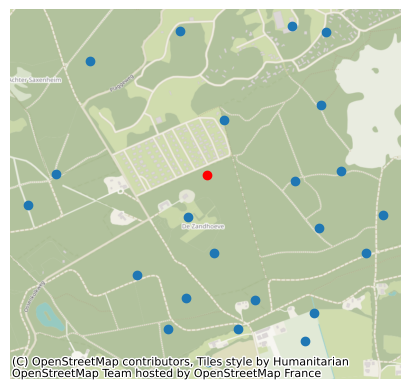

In [97]:
# Make a plot of the close-by restaurants
ax = bikestations_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

> Good! In practice, we will often use the spatial methods like within(), intersects(), .. or here by comparing the result of distance(), to create a boolean mask and take a subset of the original DataFrame.

## The Spatial Join Operation

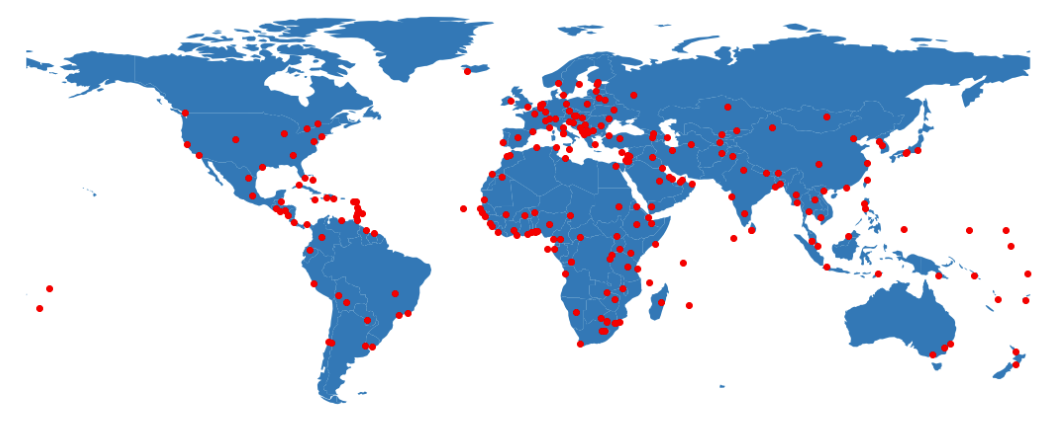

Pada gambar diatas diketahui bahwa tiap negara memiliki satu atau lebih kota. misal kota mana yang terdapat di Brazil ? 

In [98]:
brazil = countries.loc[33,'geometry']

In [99]:
cities[cities.within(brazil)]

,name,geometry
169,Brasília,POINT (-47.91800 -15.78139)
238,Rio de Janeiro,POINT (-43.22697 -22.92308)
239,São Paulo,POINT (-46.62697 -23.55673)


### The Spatial Join

Spasial join adalah operasi yang digunakan dalam pemrograman geospasial dan sistem informasi geografis (GIS) untuk menggabungkan atau menghubungkan data geografis dari dua set data yang berbeda berdasarkan lokasi atau hubungan spasial. Operasi ini memungkinkan kita untuk memahami bagaimana objek dalam dua set data berinteraksi dalam konteks geografis. Berikut adalah penjelasan yang lebih komprehensif tentang spasial join:
- **Dua Set Data**: Pada dasarnya, spasial join melibatkan dua set data yang berisi objek geografis. Set data pertama dapat berisi poligon (misalnya, batas wilayah administratif), dan set data kedua bisa berisi poin (misalnya, lokasi bisnis). Tujuan spasial join adalah untuk menghubungkan poin-poin dengan poligon yang sesuai, sehingga kita dapat menentukan di dalam wilayah administratif mana bisnis-bisnis tersebut berada.

- **Tipe Join**: Ada beberapa tipe spasial join yang umum digunakan, termasuk:
    - Inner Join: Hanya objek yang memiliki lokasi yang cocok dalam kedua set data yang akan dimasukkan ke dalam hasil join.
    - Outer Join: Semua objek dari kedua set data akan dimasukkan ke dalam hasil join, dan objek yang tidak memiliki lokasi cocok akan memiliki nilai null.
    - Left Join: Semua objek dari set data pertama akan dimasukkan, dan objek dari set data kedua yang cocok akan dimasukkan bersamaan. Objek dari set data pertama yang tidak memiliki lokasi cocok akan tetap dimasukkan, dan objek dari set data kedua yang tidak cocok akan diabaikan.
    - Right Join: Sama seperti left join, tetapi dengan fokus pada set data kedua.

- **Hubungan Spasial**: Hubungan spasial yang digunakan dalam operasi join dapat bervariasi. Ini bisa berupa:
    - Intersect: Objek dari kedua set data bersentuhan atau memiliki area bersama.
    - Contains: Objek dari satu set data sepenuhnya terkandung dalam objek dari set data lain.
    - Within: Objek dari satu set data sepenuhnya terdapat dalam objek dari set data lain.
    - Buffer: Objek dari kedua set data berada dalam jarak tertentu satu sama lain (misalnya, dalam jarak 1 kilometer).

- **Hasil Join**: Hasil dari spasial join adalah data yang menggabungkan informasi dari kedua set data berdasarkan lokasi atau hubungan spasial. Ini bisa berupa data gabungan dalam bentuk DataFrame atau tabel yang mencakup atribut atau properti dari kedua set data.

- **Aplikasi**: Spasial join sering digunakan dalam berbagai aplikasi, termasuk:

    - Analisis lokasi: untuk menentukan lokasi bisnis dalam zona pasar atau wilayah administratif.
    - Analisis lingkungan: untuk menghubungkan titik pencemaran dengan batas wilayah yang terpengaruh.
    - Analisis perencanaan kota: untuk menentukan zona atau wilayah tertentu yang terpengaruh oleh proyek perencanaan kota.

Spasial join adalah alat penting dalam pemrograman geospasial dan analisis geografis yang membantu kita memahami bagaimana objek atau data geografis berinteraksi dalam dunia nyata. Itu memungkinkan kita untuk menggabungkan dan memanfaatkan data dari berbagai sumber untuk pengambilan keputusan yang lebih baik dalam berbagai aplikasi geografis.

> - spatial join adalah transfer informasi (data atribut) dari satu layer ke layer lain berdasarkan hubungan spasial
> 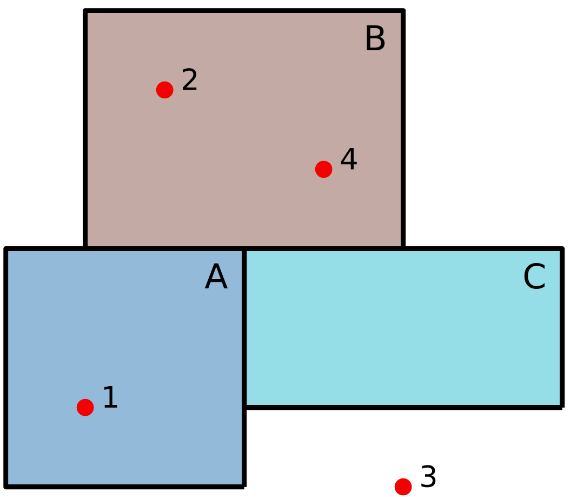
> misal pada gambar diatas, terdapat 3 buah poligon yaitu A,B dan C dan memiliki kumpulan data dengan 4 titik yaitu 1,2,3 dan 4
> spatial join akan menghubungkan atribut yang disimpan dalam poligon GeoDataFrame ke titik GeoDataFrame berdasarkan polygon yang berisi tiap titik. 
> 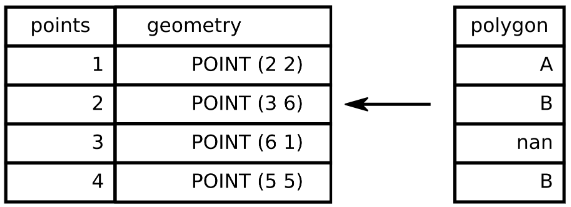
> Dengan cara ini atribut poligon A akan digabungkan ke poin 1, dan poligon B akan dihubugnkan ke titik 2 dan 4. Ini dikenal dengan nama Left Join.

In [100]:
joined = geopandas.sjoin(cities,
                        countries[['ADMIN','geometry']],
                        op = 'within')

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [101]:
joined.head()

,name,geometry,index_right,ADMIN
0,Vatican City,POINT (12.45339 41.90328),241,Vatican
1,San Marino,POINT (12.44177 43.93610),206,San Marino
2,Vaduz,POINT (9.51667 47.13372),133,Liechtenstein
3,Lobamba,POINT (31.20000 -26.46667),216,Swaziland
16,Mbabane,POINT (31.13333 -26.31665),216,Swaziland


### Exercise

**Paris: spatial join of districts and bike stations**

Let's return to the Paris data on districts and bike stations. We will now use the spatial join operation to identify the district in which each station is located.

The districts and bike sharing stations datasets are already pre-loaded for you as the districts and stations GeoDataFrames, and GeoPandas has been imported as geopandas

- Use the geopandas.sjoin() function to add the district name in which each station is located to the stations dataset. Call the result joined.
- Check the result by showing the first five rows.

In [102]:
# Join the districts and stations datasets
joined = geopandas.sjoin(stations, districts, op='within')

# Inspect the first five rows of the result
print(joined.head())

                                       name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                           geometry  index_right  id district_name  population  
0    POINT (650791.111 6860114.328)           52  53  Montparnasse       18570  
143  POINT (651406.382 6859738.689)           52  53  Montparnasse       18570  
293  POINT (650694.991 6859723.873)           52  53  Montparnasse       18570  
346  POINT (651327.035 6859441.637)           52  53  Montparnasse       18570  
429  POINT (651261.351 6859926.893)           52  53  Montparnasse       18570  


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


> Nice! You can see how the attribute information of the districts are added as new columns to the stations dataframe. In the next exercises, we will use a similar spatial join in a more complete analysis pipeline.

**Map of tree density by district (1)**

Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. For this, we first need to find out how many trees each district contains, which we will do in this exercise. In the following exercise, we will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

GeoPandas has been imported as geopandas.

- Import the trees dataset "paris_trees.gpkg" and call the result trees. Also read the districts dataset we have seen previously ("paris_districts_utm.geojson"), and call this districts.

In [109]:
# Read the trees and districts data
trees = geopandas.read_file("dataset/paris_trees.gpkg")
districts = geopandas.read_file("dataset/paris_districts_utm.geojson")

# The trees dataset with point locations of trees
print(trees.head())

      species location_type                        geometry
0  Marronnier    Alignement  POINT (455834.122 5410780.606)
1  Marronnier    Alignement  POINT (446546.284 5412574.697)
2  Marronnier    Alignement  POINT (449768.283 5409876.557)
3  Marronnier    Alignement  POINT (451779.708 5409292.071)
4     Sophora    Alignement  POINT (447041.361 5409756.712)


- Add a column with the 'district_name' to the trees dataset using a spatial join. Call the result joined.

In [110]:
# Spatial join of the trees and districts datasets
joined = geopandas.sjoin(trees, districts, op='within')

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [111]:
joined.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476


- Calculate the number of trees located in each district: group the joined DataFrame by the 'district_name' column, and calculate the size of each group. We convert the resulting Series trees_by_district to a DataFrame for the next exercise.



In [113]:
# Calculate the number of trees in each district
trees_by_district = joined.groupby('district_name').size()

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district)

                        n_trees
district_name                  
Amérique                    183
Archives                      8
Arsenal                      60
Arts-et-Metiers              20
Auteuil                     392
...                         ...
St-Germain-l'Auxerrois       40
Ternes                      131
Val-de-Grace                 25
Villette                    110
Vivienne                      1

[80 rows x 1 columns]


> Great! We calculated the number of trees in each of the districts of Paris. Now, we can make a plot of this, what you will do in the next exercise.

**Map of tree density by district (2)**

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (trees_by_district) back to the districts dataset. We will use the pd.merge() function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

The district dataset has been pre-loaded as districts, and the final result of the previous exercise (a DataFrame with the number of trees for each district) is available as trees_by_district. GeoPandas has been imported as geopandas and Pandas as pd.

- Use the pd.merge() function to merge districts and trees_by_district dataframes on the 'district_name' column. Call the result districts_trees.

In [46]:
import pandas as pd

In [115]:
trees_by_district = pd.read_csv('dataset/_chapter2-trees_by_district.csv')
trees_by_district.head()

,district_name,n_trees
0,Amérique,728
1,Archives,34
2,Arsenal,213
3,Arts-et-Metiers,79
4,Auteuil,1474


In [116]:
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [117]:
# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')

# Inspect the result
print(districts_trees.head())

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...      152  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...      149  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        6  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...       17  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...       18  


- Add a column 'n_trees_per_area' to the districts_trees dataframe, based on the 'n_trees' column divided by the area.

In [118]:
# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')

# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area

In [119]:
districts_trees.head()

,id,district_name,population,geometry,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",152,0.000175
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",149,0.000361
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",6,0.000022
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",17,0.000063
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",18,0.000096


- Make a plot of the districts_trees dataframe, using the 'n_trees_per_area' column to determine the color of the polygons.

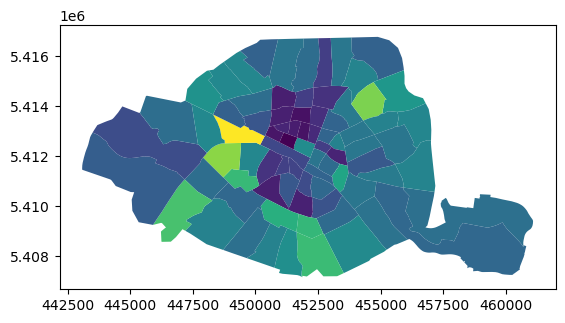

In [120]:
# Make of map of the districts colored by 'n_trees_per_area'
districts_trees.plot(column='n_trees_per_area')
plt.show()

> Great! You now used the spatial join in a more complex example, also showing how to combine geopandas functionality with pandas operations in a typical workflow. The last figure you made is called a choropleth. We will look at that in more detail in the next video.

## Choropleths

Choropleth adalah jenis visualisasi data yang digunakan untuk menggambarkan data numerik berdasarkan wilayah geografis atau administratif. Dalam choropleth, daerah-daerah geografis, seperti negara, negara bagian, kabupaten, atau wilayah lainnya, diwarnai atau diisi dengan warna berdasarkan nilai data numerik yang terkait dengan wilayah-wilayah tersebut. Ini memungkinkan kita untuk memahami pola spasial data dan perbandingan antar wilayah secara visual. Berikut beberapa poin penting tentang choropleth:

- **Pemetaan Data**: Choropleth adalah alat yang berguna untuk memetakan data geografis. Ini memungkinkan kita untuk menggambarkan data numerik yang berkaitan dengan lokasi geografis pada peta.

- **Warna**: Wilayah-wilayah geografis diisi dengan warna atau pola berbeda-beda berdasarkan nilai data yang sesuai. Warna yang lebih gelap atau pola yang berbeda dapat menunjukkan nilai yang lebih tinggi, sementara warna yang lebih terang atau pola yang seragam menunjukkan nilai yang lebih rendah.

- **Legenda**: Choropleth biasanya dilengkapi dengan legenda yang menjelaskan skala warna dan nilai yang sesuai. Ini memungkinkan pemirsa untuk memahami makna warna yang digunakan dalam visualisasi.

- **Data Terkait Wilayah**: Untuk membuat choropleth, Anda memerlukan data numerik yang terkait dengan wilayah-wilayah geografis yang akan Anda gambarkan. Data ini bisa berupa berbagai jenis informasi, seperti penduduk, pendapatan per kapita, tingkat pengangguran, atau faktor lain yang bervariasi antar wilayah.

- **Aplikasi**: Choropleth digunakan dalam berbagai aplikasi, termasuk ilmu politik (untuk pemetaan hasil pemilu), ekonomi (untuk analisis pertumbuhan ekonomi), ilmu lingkungan (untuk pemetaan polusi), ilmu kesehatan (untuk pemetaan penyebaran penyakit), dan banyak lagi.

- **Perbandingan Visual**: Choropleth memberikan cara yang efektif untuk membandingkan data antar wilayah. Anda dapat melihat dengan jelas perbedaan antara wilayah yang satu dengan wilayah yang lain.

Choropleth adalah salah satu alat visualisasi data yang penting dalam analisis geografis dan ilmu sosial. Ini membantu kita mengidentifikasi pola geografis, mengambil keputusan berdasarkan lokasi, dan memahami perbandingan data di seluruh wilayah geografis. Visualisasi ini juga sering digunakan dalam laporan, artikel, dan presentasi yang berfokus pada data geografis.

> - Cloropleth adalah peta dimana atribut data non-spasial ditampilkan dengan skema warna yang mewakili nilai tertentu. 
> - Untuk membuat cloropleth gunakan method `.plot()` dari geopandas 
> ada hal yang perlu diperhatikan dalam pembuatan Cloropleth
    - penentuan `k`> jumlah kelas
        - jika nilai k terlalu sedikit maka berpotensi menghilangkan informasi
        - jika terlalu banyak memperlambat proses 
        - disarankan untuk membuat kelas 3-12 kelas
    - penentuan `scheme` > tahapan klasifikasi kelas
        - equal interval akan membagi range tiap kelas bernilai sama 
        - quantile akan mengalokasikan proporsi yang sama untuk setiap warna 
    - warna palet `cmap` > pewarnaan pada palet
        - sesuaikan dengan tujuan peta
        - untuk data kategorik tidak perlu warna dengan skala apapun
        - untuk data kontinu bertingkat gunakan palet sekuensial
        - untuk data kontinu tidak bertingkat gunakan palet divergent

In [121]:
countries = geopandas.read_file('dataset/ne_110m_admin_0_countries.shp')
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


<Axes: >

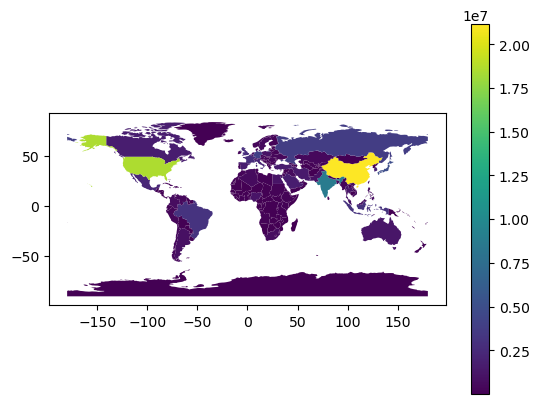

In [122]:
countries.plot(column = 'gdp_md_est', legend =True)

### Exercise 

**Equal interval choropleth**

In the last exercise, we created a map of the tree density. Now we know more about choropleths, we will explore this visualisation in more detail.

First, let's visualize the effect of just using the number of trees versus the number of trees normalized by the area of the district (the tree density). Second, we will create an equal interval version of this map instead of using a continuous color scale. This classification algorithm will split the value space in equal bins and assign a color to each.

The district_trees GeoDataFrame, the final result of the previous exercise is already loaded. It includes the variable n_trees_per_area, measuring tree density by district (note the variable has been multiplied by 10,000).

- Make a plot using the 'n_trees' variable to color the polygons. Make sure to also display a legend using the legend keyword.
- Repeat the same using the 'n_trees_per_area' variable. Do you see the difference?
- Generate a choropleth with the 'n_trees_per_area' variable using an equal interval classification scheme. Again, make sure to add a legend.

In [123]:
# Print the first rows of the tree density dataset
print(districts_trees.head())

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  \
0  POLYGON ((451922.133 5411438.484, 451922.080 5...      152   
1  POLYGON ((452278.419 5412160.893, 452192.407 5...      149   
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        6   
3  POLYGON ((451004.908 5412654.095, 450960.640 5...       17   
4  POLYGON ((451328.752 5412991.278, 451294.721 5...       18   

   n_trees_per_area  
0          0.000175  
1          0.000361  
2          0.000022  
3          0.000063  
4          0.000096  


In [129]:
districts_trees['n_trees_per_area'] = districts_trees['n_trees_per_area']*10000

In [130]:
districts_trees.head()

,id,district_name,population,geometry,n_trees,n_trees_per_area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",152,1.750068
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",149,3.614424
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",6,0.219339
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",17,0.631240
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",18,0.957907


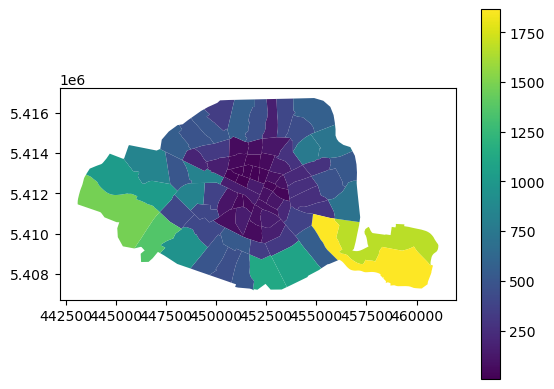

In [124]:
# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees', legend=True)
plt.show()

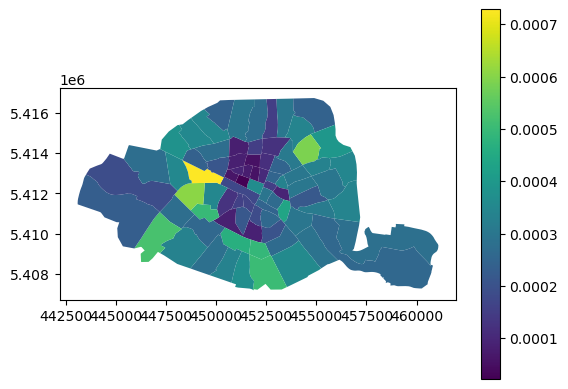

In [125]:
# Make a choropleth of the number of trees per area
districts_trees.plot(column='n_trees_per_area', legend=True)
plt.show()
           

In [126]:
#pip install mapclassify

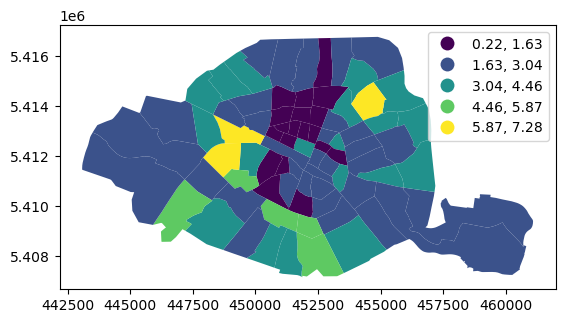

In [131]:
# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', legend=True)
plt.show()

> Nice! Do you notice the difference between the plots using n_trees and n_trees_per_area? When making choropleths, it is important to always use a variable that is normalized for the area being plotted! Further, by using a classification scheme instead of a continuous color scale, we can make the map more easily interpretable.

**Quantiles choropleth**

In this exercise we will create a quantile version of the tree density map. Remember that the quantile algorithm will rank and split the values into groups with the same number of elements to assign a color to each. This time, we will create seven groups that allocate the colors of the YlGn colormap across the entire set of values.

The district_trees GeoDataFrame is again already loaded. It includes the variable n_trees_per_area, measuring tree density by district (note the variable has been multiplied by 10,000).

- Generate a choropleth using the 'n_trees_per_area' variable, a quantile classification scheme with 7 classes and the YlGn color map. Assign the result to a variable named ax.
- Remove the frames, ticks and tick labels from the plot for a cleaner map using the set_axis_off() method.

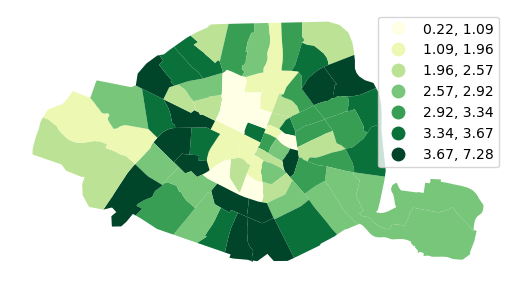

In [132]:
# Generate the choropleth and store the axis
ax = districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()

> Good! You see how easy it is to tweak the different aspects of the appearance of the choropleth?

**Compare classification algorithms**

In this final exercise, you will build a multi map figure that will allow you to compare the two approaches to map variables we have seen.

You will rely on standard matplotlib patterns to build a figure with two subplots (Axes axes[0] and axes[1]) and display in each of them, respectively, an equal interval and quantile based choropleth. Once created, compare them visually to explore the differences that the classification algorithm can have on the final result.

This exercise comes with a GeoDataFrame object loaded under the name district_trees that includes the variable n_trees_per_area, measuring tree density by district.

- Make a choropleth for the 'n_trees_per_area' column using the equal interval classification scheme on the first subplot (axes[0]). Remember that you can pass the matplotlib axes object to the ax keyword.
- Do the same for the quantile classification scheme on the second subplot (axes[1]). As in the previous plot, set the title and remove the box and axis labels to create a cleaner figure.

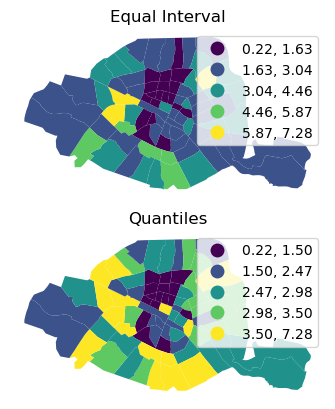

In [133]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2)

# Plot equal interval map
districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column='n_trees_per_area', scheme='quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()

> Great! You can clearly see the impact of the choice of the classification scheme.